<center><h3>VELLORE INSTITUTE OF TECHNOLOGY</h3></center>
<center><b>CSE4020	Machine Learning<b></center>
<center><b>Lab Assessment - 4<b></center>

<h1>17BCE0581</h1>
<h3>SATYAM SINGH CHAUHAN</h3>

<h1>Classification - Decision Tree</h1>
<h2>Importing the Required Libraries</h2>

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<b>Loading Data</b>

In [6]:
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

#Inspecting dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>Feature Selection</b>

In [22]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

# Features
X = pima[feature_cols]

# Target variable
y = pima.label

<b>Splitting Data</b>

In [23]:
# Split dataset into training set and test set

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<b>Building Decision Tree Model</b>

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<b>Evaluating Model</b>

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[113,  33],
       [ 41,  44]])

<b>Visualizing Decision Trees</b>

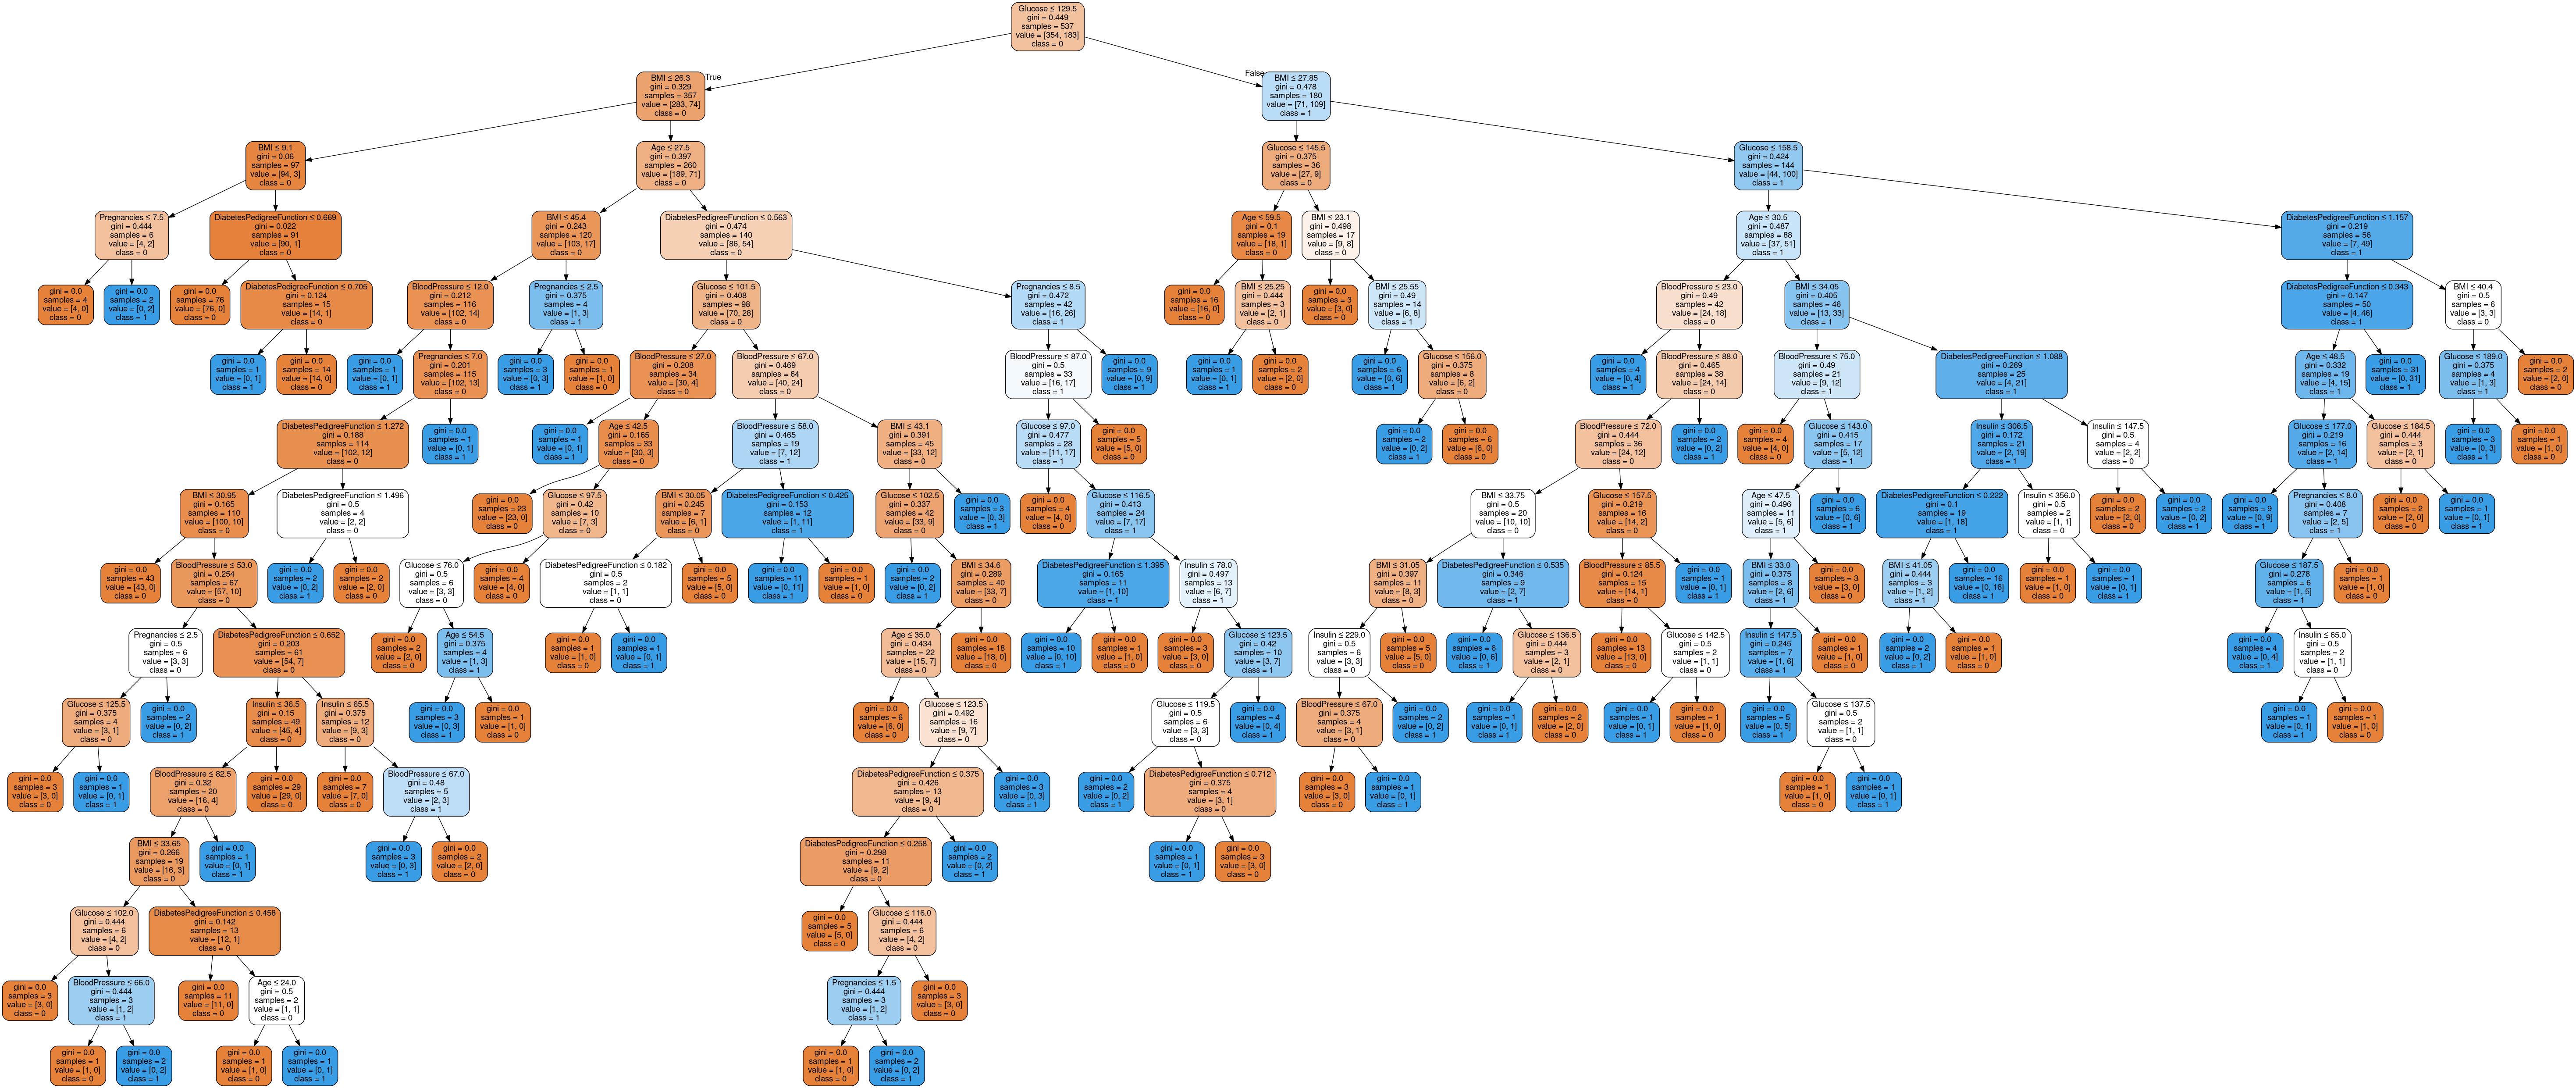

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

<b>Optimizing Decision Tree Performance</b>

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


<b>Visualizing Decision Trees</b>

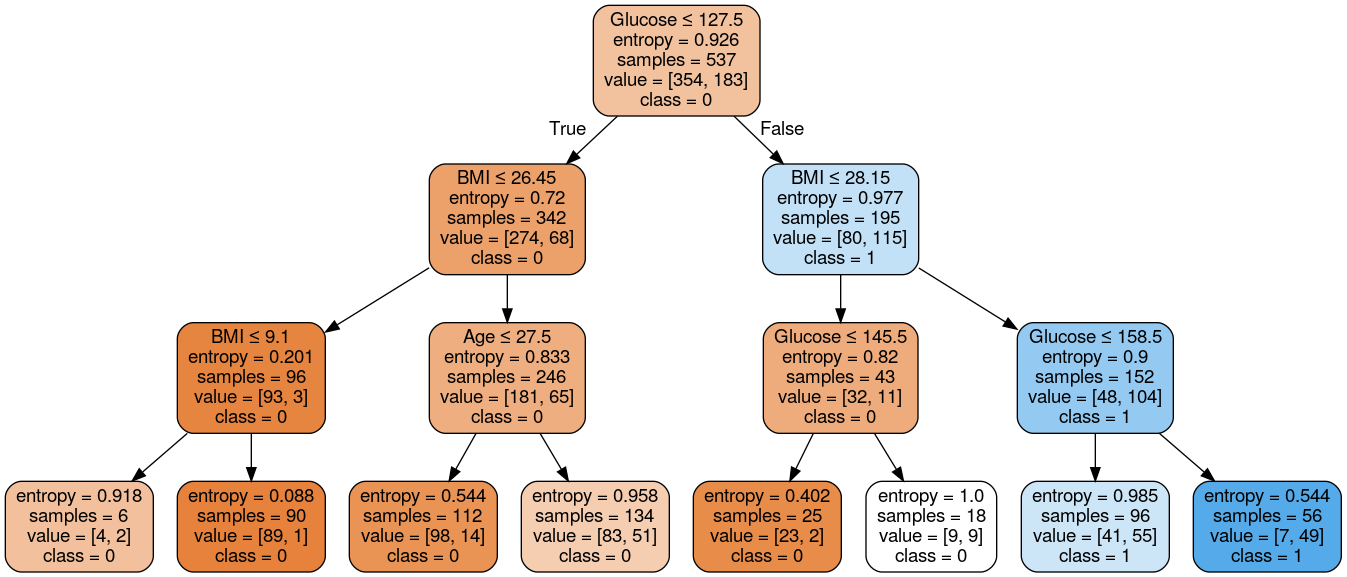

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

<b>Displaying Confusion Matrix</b>

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[124,  22],
       [ 31,  54]])

<b>precision_recall_fscore_support</b>

In [49]:
from sklearn.metrics import precision_recall_fscore_support
print('Binary: ',precision_recall_fscore_support(y_test, y_pred, average='binary'))
print('Micro: ',precision_recall_fscore_support(y_test, y_pred, average='micro'))
print('Macro: ',precision_recall_fscore_support(y_test, y_pred, average='macro'))
print('Weighted: ',precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Binary:  (0.7105263157894737, 0.6352941176470588, 0.6708074534161491, None)
Micro:  (0.7705627705627706, 0.7705627705627706, 0.7705627705627706, None)
Macro:  (0.7552631578947369, 0.7423045930701047, 0.74736385959844, None)
Weighted:  (0.7670767828662566, 0.7705627705627706, 0.7675800534387851, None)


<b>F-Score</b>

In [53]:
from sklearn.metrics import f1_score
print('Binary: ',f1_score(y_test, y_pred, average='binary'))
print('Micro: ',f1_score(y_test, y_pred, average='micro'))
print('Macro: ',f1_score(y_test, y_pred, average='macro'))
print('Weighted: ',f1_score(y_test, y_pred, average='weighted'))


Binary:  0.6708074534161491
Micro:  0.7705627705627706
Macro:  0.74736385959844
Weighted:  0.7675800534387851


<b>Computing cross-validated metrics</b>

<center><b>Conclusion</b></center>
When we observe the results we get the Accuracy of 0.77 that is 77%. This is the Accuracy after we Optimized the Decision Tree Performance. We optimized the performance of 67.9% to 77%.